In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
wine_input = wine[['alcohol','sugar','pH']]
wine_target = wine[['class']]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()

In [11]:
ss.fit(wine_input)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
wine_input_ss = ss.transform(wine_input)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_wine_ss, test_wine_ss, train_wine_target, test_wine_target = train_test_split(wine_input_ss, wine_target)

In [20]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [21]:
sc = SGDClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [22]:
sc.fit(train_wine_ss, train_wine_target)
lr.fit(train_wine_ss, train_wine_target)
dt.fit(train_wine_ss, train_wine_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
print("SGD 결과 ",sc.score(train_wine_ss,train_wine_target), sc.score(test_wine_ss, test_wine_target))
print("Logis 결과 ", lr.score(train_wine_ss,train_wine_target), lr.score(test_wine_ss, test_wine_target))
print("DTR 결과 ", dt.score(train_wine_ss,train_wine_target), dt.score(test_wine_ss, test_wine_target))

SGD 결과  0.7545155993431856 0.7513846153846154
Logis 결과  0.7783251231527094 0.7883076923076923
DTR 결과  0.9973316912972086 0.8756923076923077


In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

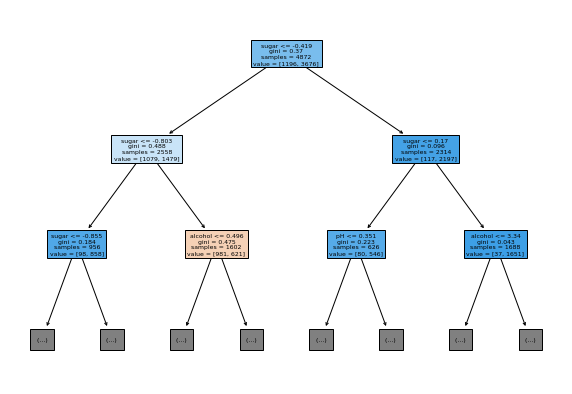

In [30]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [31]:
dt2 = DecisionTreeClassifier(max_depth=3)

In [32]:
dt2.fit(train_wine_ss, train_wine_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
print("train ", dt2.score(train_wine_ss, train_wine_target))
print("test ", dt2.score(test_wine_ss, test_wine_target))

train  0.8507799671592775
test  0.8461538461538461


[Text(167.4, 190.26, 'X[1] <= -0.419\ngini = 0.37\nsamples = 4872\nvalue = [1196, 3676]'),
 Text(83.7, 135.9, 'X[1] <= -0.803\ngini = 0.488\nsamples = 2558\nvalue = [1079, 1479]'),
 Text(41.85, 81.53999999999999, 'X[1] <= -0.855\ngini = 0.184\nsamples = 956\nvalue = [98, 858]'),
 Text(20.925, 27.180000000000007, 'gini = 0.046\nsamples = 513\nvalue = [12, 501]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.313\nsamples = 443\nvalue = [86, 357]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.496\ngini = 0.475\nsamples = 1602\nvalue = [981, 621]'),
 Text(104.625, 27.180000000000007, 'gini = 0.392\nsamples = 1006\nvalue = [737, 269]'),
 Text(146.475, 27.180000000000007, 'gini = 0.484\nsamples = 596\nvalue = [244, 352]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 0.17\ngini = 0.096\nsamples = 2314\nvalue = [117, 2197]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.351\ngini = 0.223\nsamples = 626\nvalue = [80, 546]'),
 Text(188.32500000000002, 27.180000000000007, 'gin

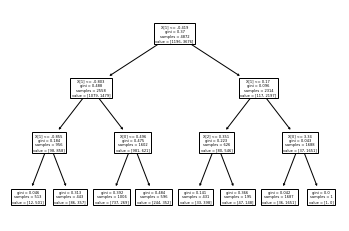

In [34]:
plot_tree(dt2)

In [43]:
wine_input_train, wine_input_test, wine_target_train, wine_target_test = train_test_split(wine_input, wine_target)

In [44]:
dt3 = DecisionTreeClassifier(max_depth=3)

In [45]:
dt3.fit(wine_input_train, wine_target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 190.26, 'X[1] <= 4.05\ngini = 0.372\nsamples = 4872\nvalue = [1204, 3668]'),
 Text(83.7, 135.9, 'X[1] <= 1.675\ngini = 0.487\nsamples = 2677\nvalue = [1121, 1556]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 1.375\ngini = 0.194\nsamples = 967\nvalue = [105, 862]'),
 Text(20.925, 27.180000000000007, 'gini = 0.046\nsamples = 509\nvalue = [12, 497]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.324\nsamples = 458\nvalue = [93, 365]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 11.025\ngini = 0.482\nsamples = 1710\nvalue = [1016, 694]'),
 Text(104.625, 27.180000000000007, 'gini = 0.4\nsamples = 1052\nvalue = [761, 291]'),
 Text(146.475, 27.180000000000007, 'gini = 0.475\nsamples = 658\nvalue = [255, 403]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 6.25\ngini = 0.073\nsamples = 2195\nvalue = [83, 2112]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 3.295\ngini = 0.211\nsamples = 483\nvalue = [58, 425]'),
 Text(188.32500000000002, 27.180000000000007, 'gini =

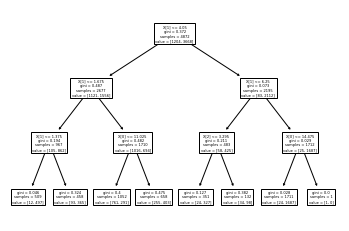

In [46]:
plot_tree(dt3, max_depth=3)

In [51]:
print("전처리하기전 dt score train ", dt3.score(wine_input_train, wine_target_train))
print("전처리하기전 dt score test ", dt3.score(wine_input_test, wine_target_test))

전처리하기전 dt score train  0.8495484400656814
전처리하기전 dt score test  0.8406153846153847


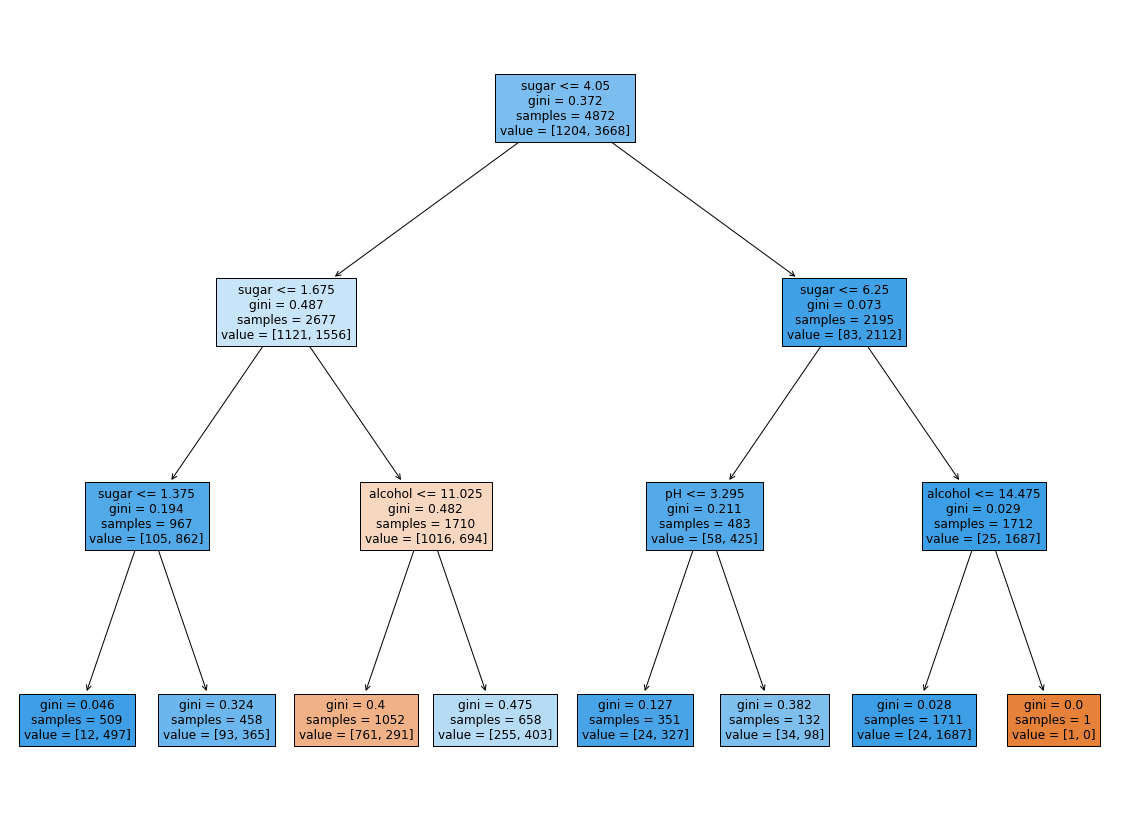

In [52]:
plt.figure(figsize=(20,15))
plot_tree(dt3,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [57]:
print(dt.feature_importances_)


[0.2334153  0.51286695 0.25371776]
3
